In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# After GridSearchCV

In [2]:
data=pd.read_csv("C:/Users/Admin/Desktop/project data.csv",encoding="unicode_escape")# unicode is used since our data is in different formats like date in different temperature in celsius etc
data.shape

(8760, 14)

In [3]:
data["Date"]=pd.to_datetime(data["Date"],format='mixed')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
data["Day"]=data["Date"].dt.day
data["Month"]=data["Date"].dt.month
data["Year"]=data["Date"].dt.year
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018


In [5]:
df=data.drop("Date",axis=1)

In [6]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018


In [7]:
q1=df["Rented Bike Count"].quantile(0.25)
q3=df["Rented Bike Count"].quantile(0.75)
iqr=q3-q1
um=q3+(1.5*iqr)
lm=q1-(1.5*iqr)
new_data=df.loc[(df["Rented Bike Count"]<um)&(data["Rented Bike Count"]>lm)]
new_data
new_data.shape

(8602, 16)

In [8]:
q1=new_data["Solar Radiation (MJ/m2)"].quantile(0.25)
q3=new_data["Solar Radiation (MJ/m2)"].quantile(0.75)
iqr=q3-q1
um=q3+(1.5*iqr)
lm=q1-(1.5*iqr)
new_data1=new_data.loc[(new_data["Solar Radiation (MJ/m2)"]<um)&(new_data["Solar Radiation (MJ/m2)"]>lm)]
new_data1
new_data1.shape

(7962, 16)

In [9]:
outliers=new_data1[(new_data1["Rainfall(mm)"]>(3*0.15*1.13))|(new_data1["Rainfall(mm)"]<-(3*0.15*1.13))]
o=pd.DataFrame(outliers)
o
index=o.index.tolist()
index

[54,
 57,
 141,
 222,
 225,
 417,
 420,
 561,
 564,
 567,
 723,
 933,
 1266,
 1458,
 1461,
 2019,
 2151,
 2154,
 2157,
 2160,
 2253,
 2256,
 2259,
 2262,
 2331,
 2334,
 2502,
 2505,
 2508,
 2978,
 2979,
 2980,
 2981,
 2982,
 3007,
 3008,
 3016,
 3017,
 3019,
 3021,
 3026,
 3027,
 3028,
 3090,
 3091,
 3142,
 3143,
 3220,
 3222,
 3223,
 3224,
 3225,
 3226,
 3425,
 3428,
 3429,
 3430,
 3431,
 3432,
 3434,
 3436,
 3437,
 3438,
 3439,
 3440,
 3441,
 3442,
 3443,
 3444,
 3445,
 3446,
 3447,
 3448,
 3450,
 3451,
 3452,
 3453,
 3459,
 3655,
 3660,
 3661,
 3669,
 3671,
 3747,
 3748,
 3749,
 3750,
 3751,
 3752,
 3753,
 3754,
 3755,
 3756,
 3896,
 3897,
 3898,
 3899,
 3900,
 3901,
 3902,
 3903,
 3904,
 3905,
 3906,
 3907,
 3908,
 3910,
 3911,
 3987,
 3990,
 3993,
 3994,
 3997,
 4010,
 4011,
 4012,
 4016,
 4017,
 4018,
 4019,
 4020,
 4025,
 4026,
 4028,
 4029,
 4030,
 4031,
 4032,
 4033,
 4035,
 4036,
 4145,
 4146,
 4147,
 4151,
 4152,
 4153,
 4154,
 4316,
 4631,
 4632,
 4686,
 4687,
 4688,
 4689,

In [10]:
final_data=new_data1.drop(index)
final_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018


In [11]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder=LabelEncoder()
final_data["Holiday"]=label_encoder.fit_transform(final_data["Holiday"])
final_data["Seasons"]=label_encoder.fit_transform(final_data["Seasons"])
final_data["Functioning Day"]=label_encoder.fit_transform(final_data["Functioning Day"])
final_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1,30,11,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1,30,11,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1,30,11,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1,30,11,2018


In [13]:
Y=final_data["Rented Bike Count"]
Y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 7641, dtype: int64

In [14]:
X=final_data.drop(["Rented Bike Count"],axis=1)
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,2017
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,2017
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,12,1,2017
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,2017
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1,30,11,2018
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1,30,11,2018
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1,30,11,2018
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1,30,11,2018


In [15]:
after_grid_allrmse={}

In [16]:
after_grid_allr2={}

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor(max_depth=10,min_samples_leaf=1,min_samples_split=10,random_state=42)
clf.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [19]:
dt_y_pred=clf.predict(X_test)
dt_y_pred

array([ 316.60869565,    0.        ,   90.2173913 , ...,  291.51428571,
        118.66666667, 1948.06296296])

In [20]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,dt_y_pred)
mse

70191.07337969776

In [21]:
import numpy as np
rmse=np.sqrt(mse)
rmse

264.9359797756767

In [22]:
r_sq=r2_score(y_test,dt_y_pred)
r_sq

0.8044340861595737

In [23]:
after_grid_allrmse["DT"]=rmse
after_grid_allrmse


{'DT': 264.9359797756767}

In [24]:
after_grid_allr2["DT"]=r_sq
after_grid_allr2

{'DT': 0.8044340861595737}

# Multiple Regression

In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=model.predict(X_test)
y_pred

array([ 470.42415898,  471.24434546,  415.46279765, ...,  625.55241063,
        138.78243303, 1158.20291932])

In [27]:
mse=mean_squared_error(y_test,y_pred)
mse

149792.25286787387

In [28]:
import numpy as np
rmse=np.sqrt(mse)
rmse

387.03004129895896

In [29]:
r2=r2_score(y_test,y_pred)
r2

0.5826497956534296

In [30]:
after_grid_allrmse["LR"]=rmse
after_grid_allrmse


{'DT': 264.9359797756767, 'LR': 387.03004129895896}

In [31]:
after_grid_allr2["LR"]=r2
after_grid_allr2

{'DT': 0.8044340861595737, 'LR': 0.5826497956534296}

# ElasticNet

In [32]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.9,random_state=42)
elastic_net.fit(X_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42)

In [33]:
elastic_y_pred=elastic_net.predict(X_test)
elastic_y_pred

array([ 450.55208976,  673.49608495,  389.278163  , ...,  628.56836305,
        131.87483043, 1145.51269239])

In [34]:
mse=mean_squared_error(y_test,elastic_y_pred)
mse

152909.6921713117

In [35]:
rmse=np.sqrt(mse)
rmse

391.0366890348164

In [36]:
r2=r2_score(y_test,elastic_y_pred)
r2

0.5739640064659512

In [37]:
after_grid_allrmse["Elastic"]=rmse
after_grid_allrmse


{'DT': 264.9359797756767,
 'LR': 387.03004129895896,
 'Elastic': 391.0366890348164}

In [38]:
after_grid_allr2["Elastic"]=r2
after_grid_allr2

{'DT': 0.8044340861595737,
 'LR': 0.5826497956534296,
 'Elastic': 0.5739640064659512}

# KNN

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn_regressor=KNeighborsRegressor(metric='manhattan',n_neighbors= 5, weights='distance')
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(metric='manhattan', weights='distance')

In [40]:
knn_y_pred=knn_regressor.predict(X_test)
knn_y_pred

array([ 287.7289071 ,    0.        ,  377.61836318, ...,  308.95425369,
        261.20533212, 2086.26089631])

In [41]:
mse=mean_squared_error(y_test,knn_y_pred)
mse

76510.79917323256

In [42]:
rmse=np.sqrt(mse)
rmse

276.6058552764792

In [43]:
rsq=r2_score(y_test,knn_y_pred)
rsq

0.786826107102923

In [44]:
after_grid_allrmse["KNN"]=rmse
after_grid_allrmse

{'DT': 264.9359797756767,
 'LR': 387.03004129895896,
 'Elastic': 391.0366890348164,
 'KNN': 276.6058552764792}

In [45]:
after_grid_allr2["KNN"]=rsq
after_grid_allr2

{'DT': 0.8044340861595737,
 'LR': 0.5826497956534296,
 'Elastic': 0.5739640064659512,
 'KNN': 0.786826107102923}

# Ridge Regression

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)

Ridge()

In [47]:
ridge_y_pred=ridge_model.predict(X_test)
ridge_y_pred

array([ 470.3984996 ,  471.49219349,  415.6506091 , ...,  624.99103432,
        138.93722103, 1158.27210197])

In [48]:
mse=mean_squared_error(y_test,ridge_y_pred)
mse

149774.36765088094

In [49]:
rmse=np.sqrt(mse)
rmse

387.0069348873234

In [50]:
rsq=r2_score(y_test,ridge_y_pred)
rsq

0.5826996273291263

In [51]:
after_grid_allrmse["Ridge"]=rmse
after_grid_allrmse

{'DT': 264.9359797756767,
 'LR': 387.03004129895896,
 'Elastic': 391.0366890348164,
 'KNN': 276.6058552764792,
 'Ridge': 387.0069348873234}

In [52]:
after_grid_allr2["Ridge"]=rsq
after_grid_allr2

{'DT': 0.8044340861595737,
 'LR': 0.5826497956534296,
 'Elastic': 0.5739640064659512,
 'KNN': 0.786826107102923,
 'Ridge': 0.5826996273291263}

# Partial Least Square Regression

In [53]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [55]:
pls = PLSRegression(n_components=10)
pls.fit(X_train, y_train)

PLSRegression(n_components=10)

In [56]:
plsr_y_pred = pls.predict(X_test)
plsr_y_pred

array([[ 480.29425286],
       [ 487.8637637 ],
       [ 408.1435738 ],
       ...,
       [ 621.36113459],
       [ 147.5273228 ],
       [1166.00836347]])

In [57]:
mse=mean_squared_error(y_test,plsr_y_pred)
mse

149572.68889802622

In [58]:
rmse=np.sqrt(mse)
rmse

386.7462849181957

In [59]:
r2=r2_score(y_test,plsr_y_pred)
r2

0.5832615433635324

In [60]:
after_grid_allrmse["PLSR"]=rmse
after_grid_allrmse

{'DT': 264.9359797756767,
 'LR': 387.03004129895896,
 'Elastic': 391.0366890348164,
 'KNN': 276.6058552764792,
 'Ridge': 387.0069348873234,
 'PLSR': 386.7462849181957}

In [61]:
after_grid_allr2["PLSR"]=r2
after_grid_allr2

{'DT': 0.8044340861595737,
 'LR': 0.5826497956534296,
 'Elastic': 0.5739640064659512,
 'KNN': 0.786826107102923,
 'Ridge': 0.5826996273291263,
 'PLSR': 0.5832615433635324}

# Gradient Boosting Regression

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
gbm=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=300,subsample= 0.8,random_state=42)
gbm.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=300, random_state=42,
                          subsample=0.8)

In [63]:
gbm_y_pred=gbm.predict(X_test)
gbm_y_pred

array([ 247.6391035 ,   30.55652939,  130.07956346, ...,  295.40221982,
        103.34716031, 1879.80646281])

In [64]:
mse=mean_squared_error(y_test,gbm_y_pred)
mse

44367.96385735066

In [65]:
rmse=np.sqrt(mse)
rmse

210.63704293725417

In [66]:
r2=r2_score(y_test,gbm_y_pred)
r2

0.8763822665873136

In [67]:
after_grid_allrmse["Gradient Boosting"]=rmse
after_grid_allrmse

{'DT': 264.9359797756767,
 'LR': 387.03004129895896,
 'Elastic': 391.0366890348164,
 'KNN': 276.6058552764792,
 'Ridge': 387.0069348873234,
 'PLSR': 386.7462849181957,
 'Gradient Boosting': 210.63704293725417}

In [68]:
after_grid_allr2["Gradient Boosting"]=r2
after_grid_allr2

{'DT': 0.8044340861595737,
 'LR': 0.5826497956534296,
 'Elastic': 0.5739640064659512,
 'KNN': 0.786826107102923,
 'Ridge': 0.5826996273291263,
 'PLSR': 0.5832615433635324,
 'Gradient Boosting': 0.8763822665873136}

# SVR

In [69]:
from sklearn.svm import SVR
svr=SVR(C=100, degree=2,epsilon=0.2,gamma='auto', kernel= 'rbf')
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
svr.fit(X_train_scaled,y_train)

SVR(C=100, degree=2, epsilon=0.2, gamma='auto')

In [70]:
svr_y_pred=svr.predict(X_test_scaled)
svr_y_pred

array([2.58191563e+02, 6.47915781e-01, 2.51939568e+02, ...,
       4.05644856e+02, 2.11631908e+02, 1.45293403e+03])

In [71]:
mse=mean_squared_error(y_test,svr_y_pred)
mse

107552.2008433186

In [72]:
rmse=np.sqrt(mse)
rmse

327.9515220933097

In [73]:
rsq=r2_score(y_test,svr_y_pred)
rsq

0.7003387549055993

In [74]:
after_grid_allrmse["SVR"]=rmse
after_grid_allrmse

{'DT': 264.9359797756767,
 'LR': 387.03004129895896,
 'Elastic': 391.0366890348164,
 'KNN': 276.6058552764792,
 'Ridge': 387.0069348873234,
 'PLSR': 386.7462849181957,
 'Gradient Boosting': 210.63704293725417,
 'SVR': 327.9515220933097}

In [75]:
after_grid_allr2["SVR"]=rsq
after_grid_allr2

{'DT': 0.8044340861595737,
 'LR': 0.5826497956534296,
 'Elastic': 0.5739640064659512,
 'KNN': 0.786826107102923,
 'Ridge': 0.5826996273291263,
 'PLSR': 0.5832615433635324,
 'Gradient Boosting': 0.8763822665873136,
 'SVR': 0.7003387549055993}

# PCR

In [76]:

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:

pca = PCA(n_components= 12)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [79]:
regressor = LinearRegression()
regressor.fit(x_train_pca,y_train)

LinearRegression()

In [80]:
pcr_y_pred = regressor.predict(x_test_pca)
pcr_y_pred

array([ 511.13834707,  508.90923039,  392.36750222, ...,  568.41998924,
         40.66060758, 1215.24960135])

In [81]:
mse=mean_squared_error(y_test,pcr_y_pred)
mse

157021.361496563

In [82]:
rmse=np.sqrt(mse)
rmse

396.25920998326717

In [83]:
r2=r2_score(y_test,pcr_y_pred)
r2

0.562508100033909

In [84]:
after_grid_allrmse["PCR"]=rmse
after_grid_allrmse

{'DT': 264.9359797756767,
 'LR': 387.03004129895896,
 'Elastic': 391.0366890348164,
 'KNN': 276.6058552764792,
 'Ridge': 387.0069348873234,
 'PLSR': 386.7462849181957,
 'Gradient Boosting': 210.63704293725417,
 'SVR': 327.9515220933097,
 'PCR': 396.25920998326717}

In [85]:
after_grid_allr2["PCR"]=r2
after_grid_allr2

{'DT': 0.8044340861595737,
 'LR': 0.5826497956534296,
 'Elastic': 0.5739640064659512,
 'KNN': 0.786826107102923,
 'Ridge': 0.5826996273291263,
 'PLSR': 0.5832615433635324,
 'Gradient Boosting': 0.8763822665873136,
 'SVR': 0.7003387549055993,
 'PCR': 0.562508100033909}

# Random Forest

In [86]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score,mean_squared_error
rf_model=RandomForestRegressor(bootstrap=False,max_depth=None,max_features='log2',min_samples_leaf=1,min_samples_split=2,n_estimators=300,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300,
                      random_state=42)

In [88]:
rf_y_pred=rf_model.predict(X_test)
rf_y_pred

array([ 315.08      ,   43.99666667,  159.64666667, ...,  326.12      ,
        178.75666667, 1930.84      ])

In [89]:
rf_mse=mean_squared_error(y_test,rf_y_pred)
rf_mse

46107.92943975729

In [90]:
import numpy as np
rf_rmse=np.sqrt(rf_mse)
rf_rmse

214.72757028327146

In [91]:
rf_r_sq=r2_score(y_test,rf_y_pred)
rf_r_sq

0.8715343857558934

In [204]:
after_grid_allrmse["Random Forest"]=rf_rmse
after_grid_allrmse

{'DT': 264.9359797756767,
 'LR': 387.03004129895896,
 'Elastic': 391.0366890348164,
 'KNN': 276.6058552764792,
 'Ridge': 387.0069348873234,
 'PLSR': 386.7462849181957,
 'Gradient Boosting': 210.63704293725417,
 'SVR': 327.9515220933097,
 'PCR': 396.25920998326717,
 'Random Forest': 237.1351022899228}

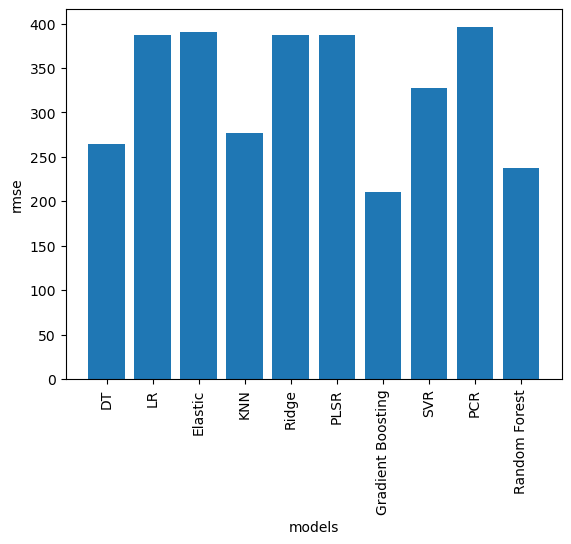

In [167]:
models=list(after_grid_allrmse.keys())
rmse=list(after_grid_allrmse.values())
plt.bar(models,rmse)
plt.xlabel("models")
plt.ylabel("rmse")
plt.xticks(rotation=90)
plt.show()

The Root mean square error og Gradient boosting,Random forest are low

In [93]:
after_grid_allr2["Random Forest"]=rf_r_sq
after_grid_allr2

{'DT': 0.8044340861595737,
 'LR': 0.5826497956534296,
 'Elastic': 0.5739640064659512,
 'KNN': 0.786826107102923,
 'Ridge': 0.5826996273291263,
 'PLSR': 0.5832615433635324,
 'Gradient Boosting': 0.8763822665873136,
 'SVR': 0.7003387549055993,
 'PCR': 0.562508100033909,
 'Random Forest': 0.8715343857558934}

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

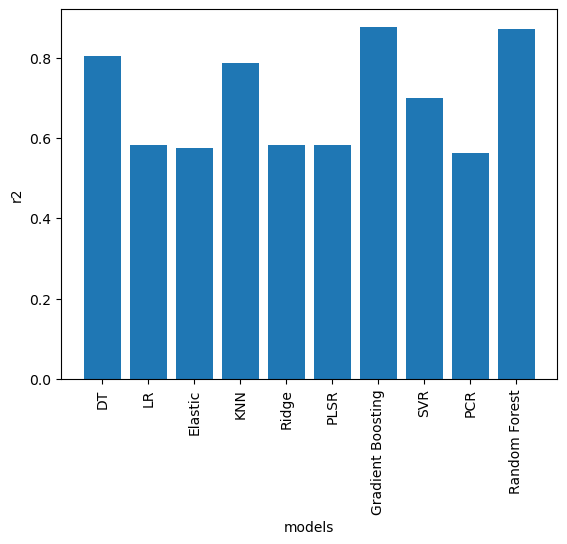

In [165]:
models=list(after_grid_allr2.keys())
r2=list(after_grid_allr2.values())
plt.bar(models,r2)
plt.xlabel("models")
plt.ylabel("r2")
plt.xticks(rotation=90)
plt.show()

The r2 of Random forest algorithm is highest followed by Gradient boosting,KNN and Decision Tree

In [213]:
bef_grid_rmse={'DT': [314.4578920301401],
 'LR': [387.0300412989586],
  'Elastic': [409.1321609371984],
 'KNN': [299.40307965560345],
'Ridge': [387.0069348873234],
 'PLSR': [386.7462849181957],
 'Gradient Boosting':[ 242.39566452960142],
 'SVR': [322.0294011604331],
 'PCR': [399.7729714917811],
 'Random Forest': [215.5561668004795]}
bef_grid_rmse

{'DT': [314.4578920301401],
 'LR': [387.0300412989586],
 'Elastic': [409.1321609371984],
 'KNN': [299.40307965560345],
 'Ridge': [387.0069348873234],
 'PLSR': [386.7462849181957],
 'Gradient Boosting': [242.39566452960142],
 'SVR': [322.0294011604331],
 'PCR': [399.7729714917811],
 'Random Forest': [215.5561668004795]}

In [214]:
after_grid_rmse={'DT': [264.9359797756767],
 'LR': [387.03004129895896],
 'Elastic':[391.0366890348164],
 'KNN': [276.6058552764792],
 'Ridge': [387.0069348873234],
 'PLSR': [386.7462849181957],
 'Gradient Boosting': [210.63704293725417],
 'SVR': [327.9515220933097],
 'PCR': [396.25920998326717],
 'Random Forest': [237.1351022899228]}
after_grid_rmse

{'DT': [264.9359797756767],
 'LR': [387.03004129895896],
 'Elastic': [391.0366890348164],
 'KNN': [276.6058552764792],
 'Ridge': [387.0069348873234],
 'PLSR': [386.7462849181957],
 'Gradient Boosting': [210.63704293725417],
 'SVR': [327.9515220933097],
 'PCR': [396.25920998326717],
 'Random Forest': [237.1351022899228]}

In [215]:
df_bef=pd.DataFrame(bef_grid_rmse)
df_after=pd.DataFrame(after_grid_rmse)

In [216]:
df_bef["Type"]="Before"
df_after["Type"]="After"

In [217]:
df_bef_melt=df_bef.melt(id_vars="Type",var_name="Model",value_name="Value")
df_after_melt=df_after.melt(id_vars="Type",var_name="Model",value_name="Value")

In [218]:
df_combined=pd.concat([df_bef_melt,df_after_melt])

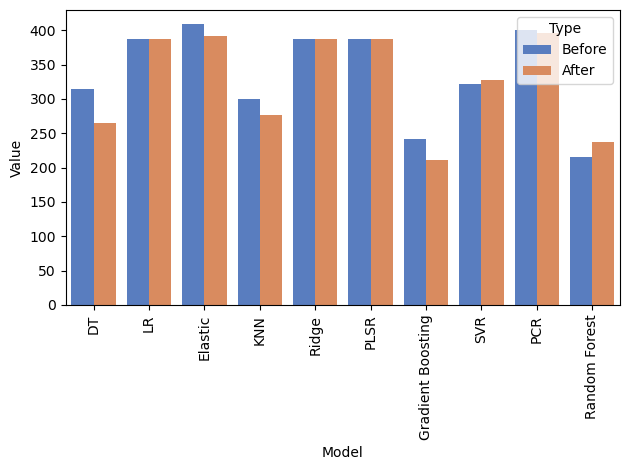

In [219]:
import seaborn as sns
sns.barplot(x="Model",y="Value",hue="Type",data=df_combined,palette="muted")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [330]:
bef_grid_r2={'DT':[0.7244906922880199],
 'Random forest': [0.8705410197055531],
 'LR': [0.5826497956534303],
 'ridge': [0.5826996273291263],
 'KNN': [0.7502394717619898],
 'SVR':[ 0.7110635538665817],
 'Elastic':[ 0.5336215042243602],
 'PCR': [0.5547149294170266],
 'PLSR': [0.5832615433635324],
 'Gradient boosting': [0.8362953658844]}
bef_grid_r2

{'DT': [0.7244906922880199],
 'Random forest': [0.8705410197055531],
 'LR': [0.5826497956534303],
 'ridge': [0.5826996273291263],
 'KNN': [0.7502394717619898],
 'SVR': [0.7110635538665817],
 'Elastic': [0.5336215042243602],
 'PCR': [0.5547149294170266],
 'PLSR': [0.5832615433635324],
 'Gradient boosting': [0.8362953658844]}

In [331]:
after_grid_r2={'DT': [0.8044340861595737],
     'Random forest': [0.8715343857558934],
 'LR': [0.5826497956534296],
 'ridge':[ 0.5826996273291263],
 'KNN': [0.786826107102923],
 'SVR': [0.7003387549055993],
'Elastic':[ 0.5739640064659512],
 'PCR': [0.562508100033909],
'PLSR': [0.5832615433635324],
'Gradient boosting': [0.8763822665873136]}
 
after_grid_r2

{'DT': [0.8044340861595737],
 'Random forest': [0.8715343857558934],
 'LR': [0.5826497956534296],
 'ridge': [0.5826996273291263],
 'KNN': [0.786826107102923],
 'SVR': [0.7003387549055993],
 'Elastic': [0.5739640064659512],
 'PCR': [0.562508100033909],
 'PLSR': [0.5832615433635324],
 'Gradient boosting': [0.8763822665873136]}

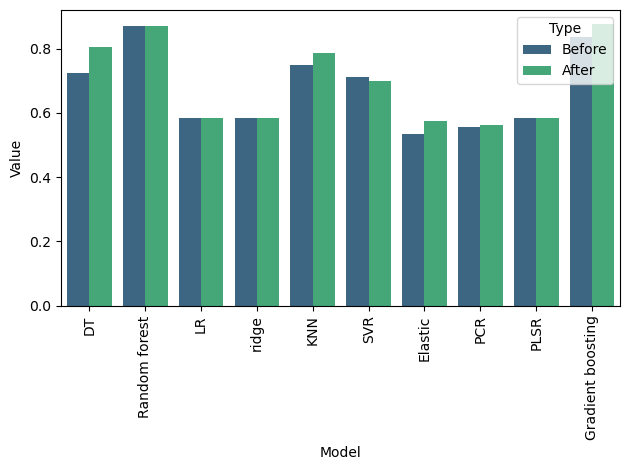

In [332]:
df_bef=pd.DataFrame(bef_grid_r2)
df_after=pd.DataFrame(after_grid_r2)
df_bef["Type"]="Before"
df_after["Type"]="After"
df_bef_melt=df_bef.melt(id_vars="Type",var_name="Model",value_name="Value")
df_after_melt=df_after.melt(id_vars="Type",var_name="Model",value_name="Value")
df_combined=pd.concat([df_bef_melt,df_after_melt])
import seaborn as sns
sns.barplot(x="Model",y="Value",hue="Type",data=df_combined,palette="viridis")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In Decision Tree algorithm,KNN and Gradient Bossting the rmse before gridsearchcv was high and it has been reduced after gridsearchcv


# Important Features

In [94]:
final_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1,30,11,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1,30,11,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1,30,11,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1,30,11,2018


In [95]:
imp_X=final_data[["Hour","Temperature(°C)","Functioning Day","Solar Radiation (MJ/m2)","Humidity(%)","Seasons"]]
imp_X

,Hour,Temperature(°C),Functioning Day,Solar Radiation (MJ/m2),Humidity(%),Seasons
0,0,-5.2,1,0.0,37,3
1,1,-5.5,1,0.0,38,3
2,2,-6.0,1,0.0,39,3
3,3,-6.2,1,0.0,40,3
4,4,-6.0,1,0.0,36,3
...,...,...,...,...,...,...
8755,19,4.2,1,0.0,34,0
8756,20,3.4,1,0.0,37,0
8757,21,2.6,1,0.0,39,0
8758,22,2.1,1,0.0,41,0


In [96]:
imp_Y=final_data["Rented Bike Count"]
imp_Y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 7641, dtype: int64

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(imp_X,imp_Y,test_size=0.2,random_state=42)


In [98]:
X_train.shape

(6112, 6)

In [245]:
all_rmse={}


In [246]:
all_r2={}

# Decision Tree

In [247]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor(random_state=42)
clf.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

In [248]:
dt_y_pred=clf.predict(X_test)
dt_y_pred

array([ 357.,    0.,   75., ...,  300.,  135., 2175.])

In [249]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,dt_y_pred)
mse

110152.75343361674

In [250]:
import numpy as np
rmse=np.sqrt(mse)
rmse

331.8926836096523

In [251]:
r_sq=r2_score(y_test,dt_y_pred)
r_sq

0.6930931121290516

In [252]:
all_rmse["DT"]=rmse
all_rmse

{'DT': 331.8926836096523}

In [253]:
all_r2["DT"]=r_sq
all_r2

{'DT': 0.6930931121290516}

# Randon Forest

In [254]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [255]:
rf_y_pred=rf_model.predict(X_test)
rf_y_pred

array([ 282.94,    0.  ,   97.91, ...,  294.53,  104.88, 1921.75])

In [256]:
rf_mse=mean_squared_error(y_test,rf_y_pred)
rf_mse

56111.670109871055

In [257]:
import numpy as np
rf_rmse=np.sqrt(rf_mse)
rf_rmse

236.87901998672456

In [258]:
rf_r_sq=r2_score(y_test,rf_y_pred)
rf_r_sq

0.8436620283210617

In [259]:
all_rmse["RF"]=rf_rmse
all_rmse

{'DT': 331.8926836096523, 'RF': 236.87901998672456}

In [260]:
all_r2["Rf"]=rf_r_sq
all_r2

{'DT': 0.6930931121290516, 'Rf': 0.8436620283210617}

# Multiple Linear Regression

In [261]:
from sklearn.linear_model import LinearRegression

In [262]:
model=LinearRegression()

In [263]:
model.fit(X_train,y_train)

LinearRegression()

In [264]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=model.predict(X_test)
y_pred

array([ 423.44645269,  442.57552714,  389.27077035, ...,  626.29550141,
         77.10082937, 1154.88058027])

In [265]:
mse=mean_squared_error(y_test,y_pred)
mse

153630.60379829397

In [266]:
import numpy as np
rmse=np.sqrt(mse)
rmse

391.95740048925467

In [267]:
r2=r2_score(y_test,y_pred)
r2

0.5719554071620723

In [268]:
all_rmse["LR"]=rmse
all_rmse

{'DT': 331.8926836096523, 'RF': 236.87901998672456, 'LR': 391.95740048925467}

In [269]:
all_r2["LR"]=r2
all_r2

{'DT': 0.6930931121290516, 'Rf': 0.8436620283210617, 'LR': 0.5719554071620723}

# Ridge Regression


In [270]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)

Ridge()

In [271]:
ridge_y_pred=ridge_model.predict(X_test)
ridge_y_pred

array([ 423.51253518,  442.62922437,  389.29548391, ...,  626.27924149,
         77.15455608, 1154.78818955])

In [272]:
mse=mean_squared_error(y_test,ridge_y_pred)
mse

153633.0170717226

In [273]:
rmse=np.sqrt(mse)
rmse

391.9604789665951

In [274]:
rsq=r2_score(y_test,ridge_y_pred)
rsq

0.5719486833152825

In [275]:
all_rmse["Ridge"]=rmse
all_rmse

{'DT': 331.8926836096523,
 'RF': 236.87901998672456,
 'LR': 391.95740048925467,
 'Ridge': 391.9604789665951}

In [276]:
all_r2["Ridge"]=rsq
all_r2

{'DT': 0.6930931121290516,
 'Rf': 0.8436620283210617,
 'LR': 0.5719554071620723,
 'Ridge': 0.5719486833152825}

# KNN

In [277]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn_regressor=KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [278]:
knn_y_pred=knn_regressor.predict(X_test)
knn_y_pred

array([ 308. ,    0. ,  131. , ...,  323.8,  162. , 1986.4])

In [279]:
mse=mean_squared_error(y_test,knn_y_pred)
mse

73179.70221059516

In [280]:
rmse=np.sqrt(mse)
rmse

270.5174711744052

In [281]:
rsq=r2_score(y_test,knn_y_pred)
rsq

0.7961071878760471

In [282]:
all_rmse["KNN"]=rmse
all_rmse

{'DT': 331.8926836096523,
 'RF': 236.87901998672456,
 'LR': 391.95740048925467,
 'Ridge': 391.9604789665951,
 'KNN': 270.5174711744052}

In [283]:
all_r2["KNN"]=rsq
all_r2

{'DT': 0.6930931121290516,
 'Rf': 0.8436620283210617,
 'LR': 0.5719554071620723,
 'Ridge': 0.5719486833152825,
 'KNN': 0.7961071878760471}

# SVR

In [284]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
svr.fit(X_train_scaled,y_train)

SVR(C=100, gamma=0.1)

In [285]:
svr_y_pred=svr.predict(X_test_scaled)
svr_y_pred

array([ 231.22264938,    1.61619342,  206.84227628, ...,  375.72626957,
        124.3946991 , 1343.94534041])

In [286]:
mse=mean_squared_error(y_test,svr_y_pred)
mse

110393.14779855442

In [287]:
rmse=np.sqrt(mse)
rmse

332.2546430052625

In [131]:
rsq=r2_score(y_test,svr_y_pred)
rsq

0.6924233269071215

In [288]:
all_rmse["SVR"]=rmse
all_rmse

{'DT': 331.8926836096523,
 'RF': 236.87901998672456,
 'LR': 391.95740048925467,
 'Ridge': 391.9604789665951,
 'KNN': 270.5174711744052,
 'SVR': 332.2546430052625}

In [289]:
all_r2["SVR"]=rsq
all_r2

{'DT': 0.6930931121290516,
 'Rf': 0.8436620283210617,
 'LR': 0.5719554071620723,
 'Ridge': 0.5719486833152825,
 'KNN': 0.7961071878760471,
 'SVR': 0.7961071878760471}

# ElasticNet

In [290]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=1.0,l1_ratio=0.5,random_state=42)
elastic_net.fit(X_train,y_train)

ElasticNet(random_state=42)

In [291]:
elastic_y_pred=elastic_net.predict(X_test)
elastic_y_pred

array([514.67584163, 558.60775193, 454.74277699, ..., 617.50085502,
       220.74147454, 981.79841532])

In [292]:
mse=mean_squared_error(y_test,elastic_y_pred)
mse

177580.38813559804

In [293]:
rmse=np.sqrt(mse)
rmse

421.402881024321

In [294]:
r2=r2_score(y_test,elastic_y_pred)
r2

0.5052266732265012

In [295]:
all_rmse["Elastic"]=rmse
all_rmse

{'DT': 331.8926836096523,
 'RF': 236.87901998672456,
 'LR': 391.95740048925467,
 'Ridge': 391.9604789665951,
 'KNN': 270.5174711744052,
 'SVR': 332.2546430052625,
 'Elastic': 421.402881024321}

In [296]:
all_r2["Elastic"]=r2
all_r2

{'DT': 0.6930931121290516,
 'Rf': 0.8436620283210617,
 'LR': 0.5719554071620723,
 'Ridge': 0.5719486833152825,
 'KNN': 0.7961071878760471,
 'SVR': 0.7961071878760471,
 'Elastic': 0.5052266732265012}

# PCR

In [297]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [298]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [299]:
n_components=5
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [300]:
regressor = LinearRegression()
regressor.fit(x_train_pca,y_train)

LinearRegression()

In [301]:
pcr_y_pred = regressor.predict(x_test_pca)
pcr_y_pred

array([ 583.4162809 ,  354.08682608,  371.22694804, ...,  550.04457494,
          2.52266053, 1101.94411356])

In [302]:
mse=mean_squared_error(y_test,pcr_y_pred)
mse

169555.44477163497

In [303]:
rmse=np.sqrt(mse)
rmse

411.7711072569747

In [304]:
r2=r2_score(y_test,pcr_y_pred)
r2

0.5275857184287511

In [305]:
all_rmse["PCR"]=rmse
all_rmse

{'DT': 331.8926836096523,
 'RF': 236.87901998672456,
 'LR': 391.95740048925467,
 'Ridge': 391.9604789665951,
 'KNN': 270.5174711744052,
 'SVR': 332.2546430052625,
 'Elastic': 421.402881024321,
 'PCR': 411.7711072569747}

In [306]:
all_r2["PCR"]=r2
all_r2

{'DT': 0.6930931121290516,
 'Rf': 0.8436620283210617,
 'LR': 0.5719554071620723,
 'Ridge': 0.5719486833152825,
 'KNN': 0.7961071878760471,
 'SVR': 0.7961071878760471,
 'Elastic': 0.5052266732265012,
 'PCR': 0.5275857184287511}

# PLSR

In [307]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [308]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [309]:
pls = PLSRegression(n_components=5)
pls.fit(X_train, y_train)

PLSRegression(n_components=5)

In [310]:
plsr_y_pred = pls.predict(X_test)
plsr_y_pred

array([[ 421.69743657],
       [ 439.26862214],
       [ 390.29335688],
       ...,
       [ 625.63408763],
       [  77.12475225],
       [1153.31290068]])

In [311]:
mse=mean_squared_error(y_test,plsr_y_pred)
mse

153652.3955080163

In [312]:
rmse=np.sqrt(mse)
rmse

391.9851980726011

In [313]:
r2=r2_score(y_test,plsr_y_pred)
r2

0.5718946912416454

In [314]:
all_rmse["PLSR"]=rmse
all_rmse

{'DT': 331.8926836096523,
 'RF': 236.87901998672456,
 'LR': 391.95740048925467,
 'Ridge': 391.9604789665951,
 'KNN': 270.5174711744052,
 'SVR': 332.2546430052625,
 'Elastic': 421.402881024321,
 'PCR': 411.7711072569747,
 'PLSR': 391.9851980726011}

In [315]:
all_r2["PLSR"]=r2
all_r2

{'DT': 0.6930931121290516,
 'Rf': 0.8436620283210617,
 'LR': 0.5719554071620723,
 'Ridge': 0.5719486833152825,
 'KNN': 0.7961071878760471,
 'SVR': 0.7961071878760471,
 'Elastic': 0.5052266732265012,
 'PCR': 0.5275857184287511,
 'PLSR': 0.5718946912416454}

# Gradient Boosting

In [316]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
gbm=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gbm.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [317]:
gbm_y_pred=gbm.predict(X_test)
gbm_y_pred

array([ 283.34670007,  124.78484442,  134.6508442 , ...,  286.88368722,
         41.19440436, 1668.88740071])

In [318]:
mse=mean_squared_error(y_test,gbm_y_pred)
mse

61760.77451389548

In [319]:
rmse=np.sqrt(mse)
rmse

248.51715134753874

In [320]:
r2=r2_score(y_test,gbm_y_pred)
r2

0.8279225302345065

In [321]:
all_rmse["Gradient Boosting"]=rmse
all_rmse

{'DT': 331.8926836096523,
 'RF': 236.87901998672456,
 'LR': 391.95740048925467,
 'Ridge': 391.9604789665951,
 'KNN': 270.5174711744052,
 'SVR': 332.2546430052625,
 'Elastic': 421.402881024321,
 'PCR': 411.7711072569747,
 'PLSR': 391.9851980726011,
 'Gradient Boosting': 248.51715134753874}

In [322]:
all_r2["Gradient Boosting"]=r2
all_r2

{'DT': 0.6930931121290516,
 'Rf': 0.8436620283210617,
 'LR': 0.5719554071620723,
 'Ridge': 0.5719486833152825,
 'KNN': 0.7961071878760471,
 'SVR': 0.7961071878760471,
 'Elastic': 0.5052266732265012,
 'PCR': 0.5275857184287511,
 'PLSR': 0.5718946912416454,
 'Gradient Boosting': 0.8279225302345065}

In [336]:
all_rmse={'DT':[ 331.8926836096523],
 
 'LR': [391.95740048925467],
'Elastic':[ 421.402881024321],
'KNN': [270.5174711744052],
 'Ridge': [391.9604789665951],
'PLSR': [391.9851980726011],
'Gradient Boosting': [248.51715134753874],
 
 'SVR': [332.2546430052625],
 
 'PCR': [411.7711072569747],
 
 
'Random Forest': [236.87901998672456]}
all_rmse

{'DT': [331.8926836096523],
 'LR': [391.95740048925467],
 'Elastic': [421.402881024321],
 'KNN': [270.5174711744052],
 'Ridge': [391.9604789665951],
 'PLSR': [391.9851980726011],
 'Gradient Boosting': [248.51715134753874],
 'SVR': [332.2546430052625],
 'PCR': [411.7711072569747],
 'Random Forest': [236.87901998672456]}

In [337]:
bef_grid_rmse={'DT': [314.4578920301401],
 'LR': [387.0300412989586],
  'Elastic': [409.1321609371984],
 'KNN': [299.40307965560345],
'Ridge': [387.0069348873234],
 'PLSR': [386.7462849181957],
 'Gradient Boosting':[ 242.39566452960142],
 'SVR': [322.0294011604331],
 'PCR': [399.7729714917811],
 'Random Forest': [215.5561668004795]}
bef_grid_rmse

{'DT': [314.4578920301401],
 'LR': [387.0300412989586],
 'Elastic': [409.1321609371984],
 'KNN': [299.40307965560345],
 'Ridge': [387.0069348873234],
 'PLSR': [386.7462849181957],
 'Gradient Boosting': [242.39566452960142],
 'SVR': [322.0294011604331],
 'PCR': [399.7729714917811],
 'Random Forest': [215.5561668004795]}

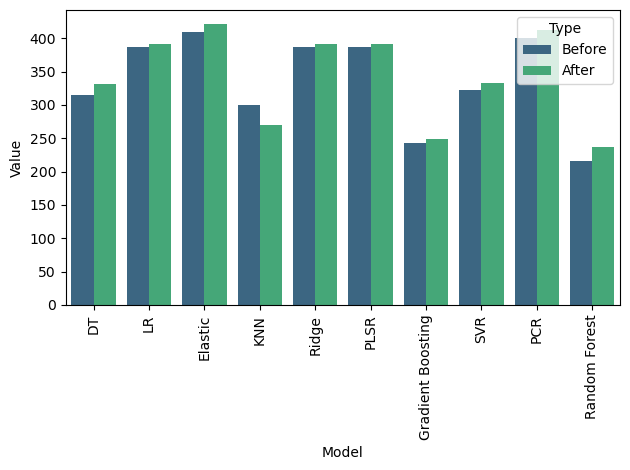

In [338]:
df_bef=pd.DataFrame(bef_grid_rmse)
df_after=pd.DataFrame(all_rmse)
df_bef["Type"]="Before"
df_after["Type"]="After"
df_bef_melt=df_bef.melt(id_vars="Type",var_name="Model",value_name="Value")
df_after_melt=df_after.melt(id_vars="Type",var_name="Model",value_name="Value")
df_combined=pd.concat([df_bef_melt,df_after_melt])
import seaborn as sns
sns.barplot(x="Model",y="Value",hue="Type",data=df_combined,palette="viridis")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [344]:
bef_grid_r2={'DT':[0.7244906922880199],
 'Rf': [0.8705410197055531],
 'LR': [0.5826497956534303],
 'Ridge': [0.5826996273291263],
 'KNN': [0.7502394717619898],
 'SVR':[ 0.7110635538665817],
 'Elastic':[ 0.5336215042243602],
 'PCR': [0.5547149294170266],
 'PLSR': [0.5832615433635324],
 'Gradient Boosting': [0.8362953658844]}
bef_grid_r2

{'DT': [0.7244906922880199],
 'Rf': [0.8705410197055531],
 'LR': [0.5826497956534303],
 'Ridge': [0.5826996273291263],
 'KNN': [0.7502394717619898],
 'SVR': [0.7110635538665817],
 'Elastic': [0.5336215042243602],
 'PCR': [0.5547149294170266],
 'PLSR': [0.5832615433635324],
 'Gradient Boosting': [0.8362953658844]}

In [345]:
all_r2={'DT':[ 0.6930931121290516],
 'Rf': [0.8436620283210617],
 'LR': [0.5719554071620723],
 'Ridge': [0.5719486833152825],
 'KNN': [0.7961071878760471],
 'SVR': [0.7961071878760471],
 'Elastic':[ 0.5052266732265012],
 'PCR': [0.5275857184287511],
 'PLSR': [0.5718946912416454],
 'Gradient Boosting':[ 0.8279225302345065]}

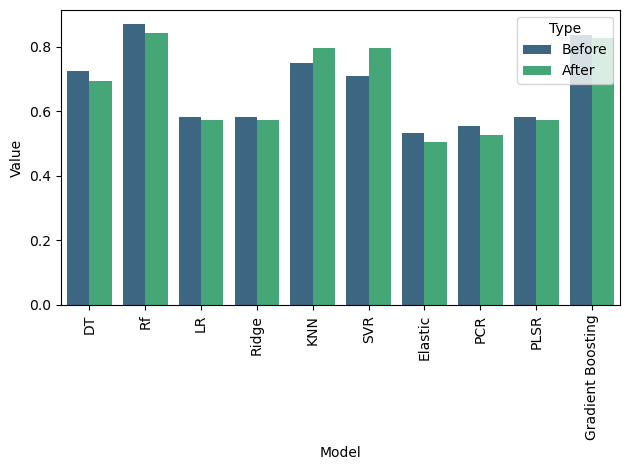

In [346]:
df_bef=pd.DataFrame(bef_grid_r2)
df_after=pd.DataFrame(all_r2)
df_bef["Type"]="Before"
df_after["Type"]="After"
df_bef_melt=df_bef.melt(id_vars="Type",var_name="Model",value_name="Value")
df_after_melt=df_after.melt(id_vars="Type",var_name="Model",value_name="Value")
df_combined=pd.concat([df_bef_melt,df_after_melt])
import seaborn as sns
sns.barplot(x="Model",y="Value",hue="Type",data=df_combined,palette="viridis")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()